<a href="https://colab.research.google.com/github/goyalkhushi/Boston-House-price-prediction/blob/main/Boston_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_california_housing
# instead of load boston we use fetch california housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
housing=fetch_california_housing()
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['target']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

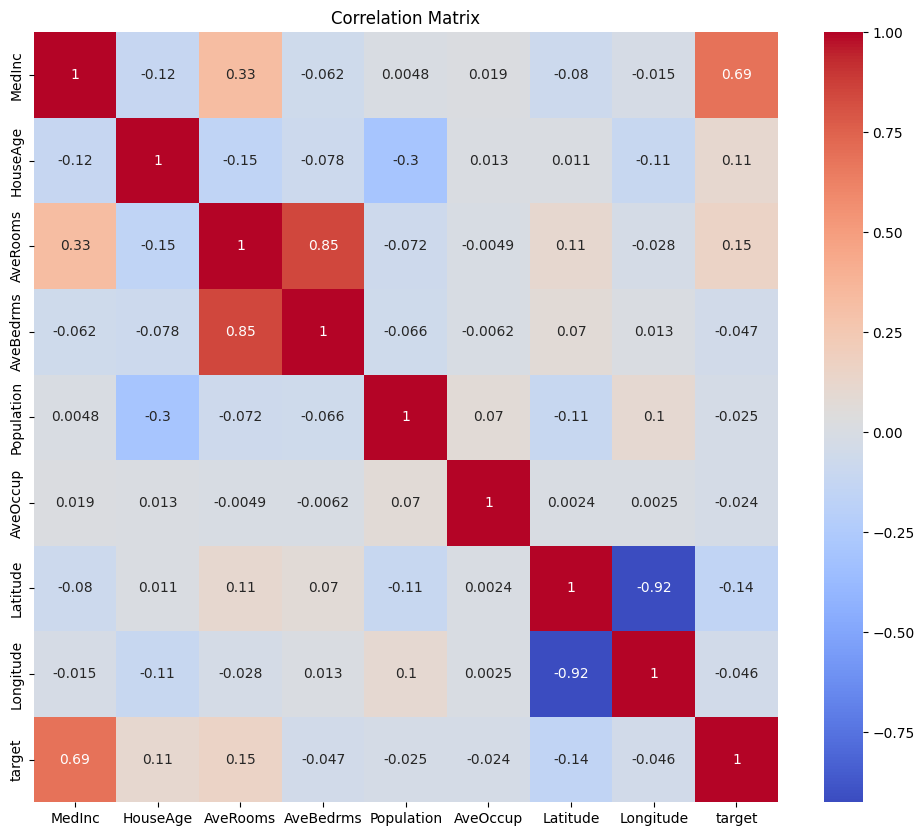

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
X=df.drop('target',axis=1)
y=df['target']


In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [12]:
model=LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_predict=model.predict(X_test)

In [15]:
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)

In [16]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R-squared: 0.58


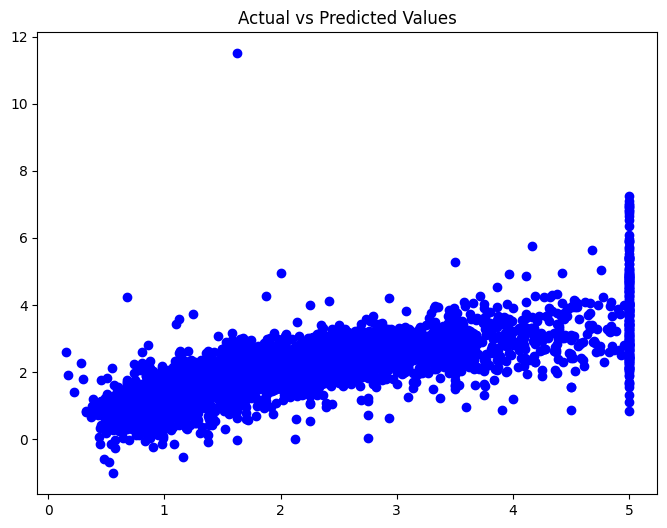

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_predict,color='blue')
plt.xlabel=('Actual target Values')
plt.ylabel=('Predicted target Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [18]:
error=y_test-y_predict

Text(0.5, 1.0, 'Distribution of Residuals')

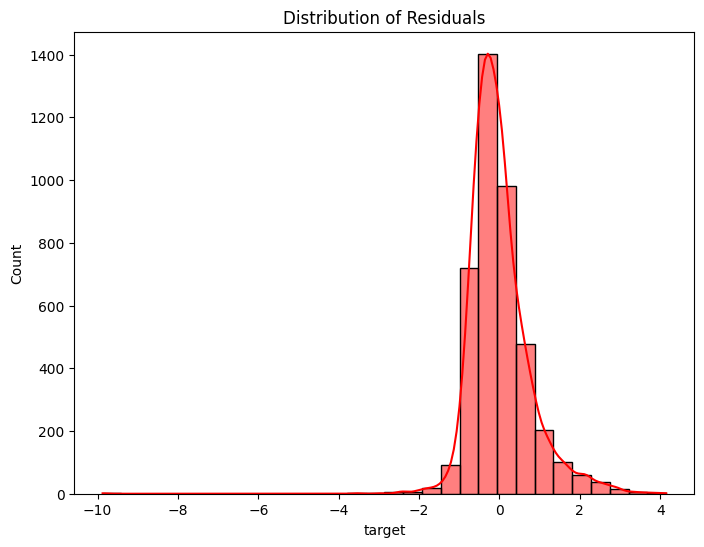

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(error, bins=30, kde=True, color='red')
plt.title("Distribution of Residuals")

